Predicting Survival in the Titanic Data Set 

In [186]:
import numpy as np
import pandas as pd


In [187]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [188]:
df=pd.read_csv("train.csv")

In [189]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. 

In [191]:
df1=df.drop(columns="Survived")

In [192]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [193]:
df1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch  (Parents/children aboard), and Fare to predict whether a passenger  survived. 


In [194]:
df1=df1.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])

In [195]:
df1.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [196]:
type(df1)

pandas.core.frame.DataFrame

In [197]:
df1.describe

<bound method NDFrame.describe of      Pclass     Sex   Age  SibSp  Parch     Fare
0         3    male  22.0      1      0   7.2500
1         1  female  38.0      1      0  71.2833
2         3  female  26.0      0      0   7.9250
3         1  female  35.0      1      0  53.1000
4         3    male  35.0      0      0   8.0500
..      ...     ...   ...    ...    ...      ...
886       2    male  27.0      0      0  13.0000
887       1  female  19.0      0      0  30.0000
888       3  female   NaN      1      2  23.4500
889       1    male  26.0      0      0  30.0000
890       3    male  32.0      0      0   7.7500

[891 rows x 6 columns]>

In [198]:
df1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


We can c that age has missing values

In [199]:
df1.isnull().sum()


Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [200]:
#df2=df1.groupby(['Sex','Pclass'])['Age'].mean()

In [201]:
df1

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [202]:
df1['Age_fill']=df1.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [203]:
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Age_fill
0,3,male,22.0,1,0,7.2500,22.00
1,1,female,38.0,1,0,71.2833,38.00
2,3,female,26.0,0,0,7.9250,26.00
3,1,female,35.0,1,0,53.1000,35.00
4,3,male,35.0,0,0,8.0500,35.00
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,27.00
887,1,female,19.0,0,0,30.0000,19.00
888,3,female,NaN,1,2,23.4500,21.75
889,1,male,26.0,0,0,30.0000,26.00


In [204]:
print(df1['Age'].isnull().sum())
print(df1['Age_fill'].isnull().sum())

177
0


In [205]:
import matplotlib.pyplot as plt

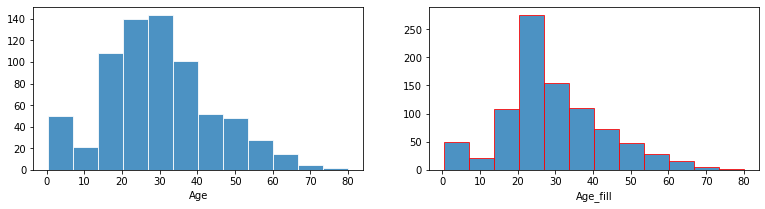

In [206]:
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(13, 3))

ax1.hist(df1['Age'].dropna(), bins=12, edgecolor='white', alpha=0.8)
ax1.set_xlabel('Age')
ax2.set_xlabel('Age_fill')
ax2.hist(df1['Age_fill'], bins=12, edgecolor='red', alpha=0.8)


plt.show()
plt.close()

In [207]:
X=df1

In [208]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Age_fill
0,3,male,22.0,1,0,7.2500,22.00
1,1,female,38.0,1,0,71.2833,38.00
2,3,female,26.0,0,0,7.9250,26.00
3,1,female,35.0,1,0,53.1000,35.00
4,3,male,35.0,0,0,8.0500,35.00
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,27.00
887,1,female,19.0,0,0,30.0000,19.00
888,3,female,NaN,1,2,23.4500,21.75
889,1,male,26.0,0,0,30.0000,26.00


In [209]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Age_fill
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,29.318643
std,0.836071,14.526497,1.102743,0.806057,49.693429,13.281103
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,21.750000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,26.507589
75%,3.000000,38.000000,1.000000,0.000000,31.000000,36.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [210]:
y=df['Survived']

In [211]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [212]:
y.size

891

In [213]:
%matplotlib inline

In [214]:
data=[X,y]

In [215]:
data

[     Pclass     Sex   Age  SibSp  Parch     Fare  Age_fill
 0         3    male  22.0      1      0   7.2500     22.00
 1         1  female  38.0      1      0  71.2833     38.00
 2         3  female  26.0      0      0   7.9250     26.00
 3         1  female  35.0      1      0  53.1000     35.00
 4         3    male  35.0      0      0   8.0500     35.00
 ..      ...     ...   ...    ...    ...      ...       ...
 886       2    male  27.0      0      0  13.0000     27.00
 887       1  female  19.0      0      0  30.0000     19.00
 888       3  female   NaN      1      2  23.4500     21.75
 889       1    male  26.0      0      0  30.0000     26.00
 890       3    male  32.0      0      0   7.7500     32.00
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64]

In [216]:
df1[df1['Age'].isnull()]


,Pclass,Sex,Age,SibSp,Parch,Fare,Age_fill
5,3,male,NaN,0,0,8.4583,26.507589
17,2,male,NaN,0,0,13.0000,30.740707
19,3,female,NaN,0,0,7.2250,21.750000
26,3,male,NaN,0,0,7.2250,26.507589
28,3,female,NaN,0,0,7.8792,21.750000
...,...,...,...,...,...,...,...
859,3,male,NaN,0,0,7.2292,26.507589
863,3,female,NaN,8,2,69.5500,21.750000
868,3,male,NaN,0,0,9.5000,26.507589
878,3,male,NaN,0,0,7.8958,26.507589


These null values r now filled in age_fill by mean

In [217]:
df1['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [218]:
df1['Fare'].isnull().values.any()    # No null values

False

In [219]:
df1['Fare'].fillna(df1['Fare'].median(), inplace=True)   # No need of this...since no null values

In [220]:
df1['Fare']   # same as above

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [221]:
genders = {"male": 0, "female": 1}
data = [X,y]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)



KeyError: 'Sex'

In [ ]:
type(data)

In [222]:
data[0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Age_fill
0,3,0,22.0,1,0,7.2500,22.00
1,1,1,38.0,1,0,71.2833,38.00
2,3,1,26.0,0,0,7.9250,26.00
3,1,1,35.0,1,0,53.1000,35.00
4,3,0,35.0,0,0,8.0500,35.00
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,27.00
887,1,1,19.0,0,0,30.0000,19.00
888,3,1,NaN,1,2,23.4500,21.75
889,1,0,26.0,0,0,30.0000,26.00


In [223]:
X=X.drop(columns="Age")

In [224]:
X

,Pclass,Sex,SibSp,Parch,Fare,Age_fill
0,3,0,1,0,7.2500,22.00
1,1,1,1,0,71.2833,38.00
2,3,1,0,0,7.9250,26.00
3,1,1,1,0,53.1000,35.00
4,3,0,0,0,8.0500,35.00
...,...,...,...,...,...,...
886,2,0,0,0,13.0000,27.00
887,1,1,0,0,30.0000,19.00
888,3,1,1,2,23.4500,21.75
889,1,0,0,0,30.0000,26.00


In [225]:
from sklearn.model_selection import train_test_split,GridSearchCV

Now r data is ready. Lets proceed for training and testing.

In [226]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=1)

In [227]:
x_train.shape, y_train.shape

((668, 6), (668,))

In [228]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc

In [229]:
clf = DecisionTreeClassifier()

In [230]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [231]:
X

,Pclass,Sex,SibSp,Parch,Fare,Age_fill
0,3,0,1,0,7.2500,22.00
1,1,1,1,0,71.2833,38.00
2,3,1,0,0,7.9250,26.00
3,1,1,1,0,53.1000,35.00
4,3,0,0,0,8.0500,35.00
...,...,...,...,...,...,...
886,2,0,0,0,13.0000,27.00
887,1,1,0,0,30.0000,19.00
888,3,1,1,2,23.4500,21.75
889,1,0,0,0,30.0000,26.00


In [232]:
feature_name=list(X.columns)

In [233]:
feature_name

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age_fill']

In [234]:
class_name = list(y_train.unique())

In [235]:
class_name

[0, 1]

In [236]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [237]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)

In [238]:
import pydotplus

In [239]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

In [240]:
graph

In [241]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [242]:
graph.write_png("dt.png")
# Show graph

True

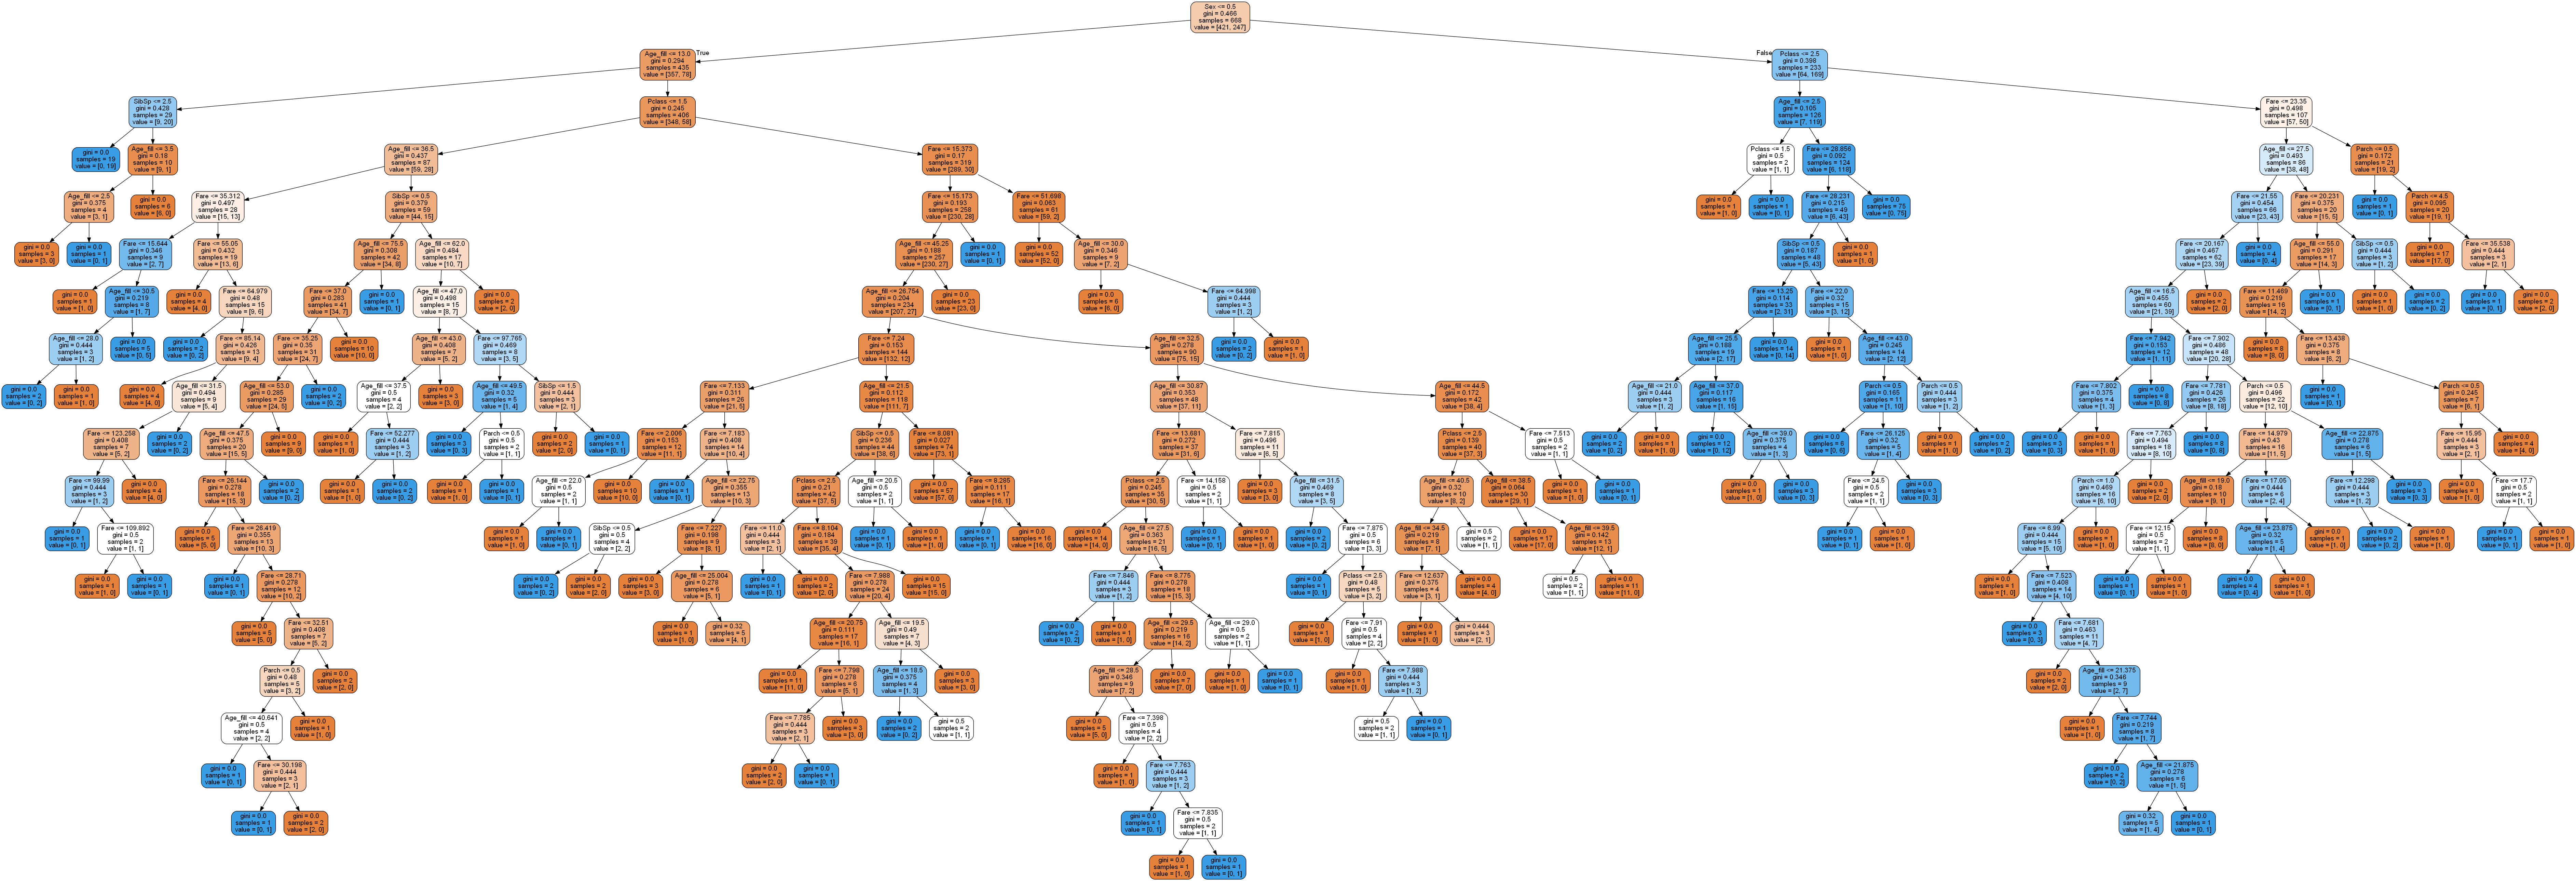

In [243]:
from IPython.display import Image  
Image(graph.create_png())

In [244]:
clf.score(x_train,y_train)

0.9895209580838323

In [245]:
py_pred = clf.predict(x_test)

In [246]:
x11=[[1,1,1,0,71.2833,38.00]]    #example test data

In [247]:
x11=[[3,0,1,0,7.2500,22.00]]

In [248]:
y1=clf.predict(x11)

In [249]:
y1[0]            # class 1 is predicted for data 1,1,1,0,71.2833,38.00

0

In [250]:
py_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [251]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7533632286995515

In [252]:
# let's save the model
import pickle

with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)

Hyperparameter Tuning

In [253]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
   
}

In [254]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [255]:
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [256]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 7, 'splitter': 'best'}


In [257]:
grid_search.best_score_

0.8502861631691168

In [258]:
grid_search.score(x_test,y_test)

0.8071748878923767

In [259]:
y_pred=grid_search.predict(x_test)      

In [260]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =8, min_samples_leaf= 7, min_samples_split= 7, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=7,
                       min_samples_split=7)

In [261]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [262]:
confusion_matrix(y_test,y_pred)     # y_test=225=25% of 891

array([[119,   9],
       [ 34,  61]], dtype=int64)

In [263]:
accuracy_score(y_test,y_pred) #78% is accuracy  

0.8071748878923767

accuracy_score is for classification only, for regression clf.score(X_test, y_test) has to be used.

In [264]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       128
           1       0.87      0.64      0.74        95

    accuracy                           0.81       223
   macro avg       0.82      0.79      0.79       223
weighted avg       0.82      0.81      0.80       223



In [265]:
from sklearn.metrics import roc_auc_score,roc_curve

In [266]:
auc=roc_auc_score(y_test,y_pred)

In [267]:
fpr,tpr,th=roc_curve(y_test,y_pred)

In [268]:
# let's save the model
import pickle

with open( 'modelForTitanic.sav', 'wb') as f:
    pickle.dump(clf,f)

In [184]:
sklearn_version = sklearn.__version__

print(sklearn_version)

NameError: name 'sklearn' is not defined